# Inspect individual weather station sites

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import geopandas as gpd
import rasterio
import xyzservices.providers as xyz
import matplotlib.cm as cm
import xyzservices as xyz
import easysnowdata
from global_snowmelt_runoff_onset.config import Config
import global_snowmelt_runoff_onset.processing as processing
import seaborn as sns
import matplotlib.pyplot as plt
import contextily as ctx


In [2]:
config = Config('../config/global_config_v6.txt')

Configuration loaded:
resolution = 0.00072000072000072
bands = vv
spatial_chunk_dim = 2048
bbox_left = -179.999
bbox_right = 179.999
bbox_top = 81.099
bbox_bottom = -59.999
wy_start = 2015
wy_end = 2024
low_backscatter_threshold = 0.001
min_monthly_acquisitions = 1
max_allowed_days_gap_per_orbit = 30
min_years_for_median_std = 3
valid_tiles_geojson_path = ../processing/global_tiles_with_seasonal_snow.geojson
tile_results_path = ../processing/tile_results_v6.csv
global_runoff_zarr_store_azure_path = snowmelt/snowmelt_runoff_onset/global_v6.zarr
seasonal_snow_mask_zarr_store_azure_path = snowmelt/snow_cover/global_modis_snow_cover.zarr


In [3]:
StationsWUS = easysnowdata.automatic_weather_stations.StationCollection()
StationsWUS.get_entire_data_archive()

Geodataframe with all stations has been added to the Station object. Please use the .all_stations attribute to access.
Use the .get_data(stations=geodataframe/string/list,variables=string/list,start_date=str,end_date=str) method to fetch data for specific stations and variables.
Decompressing data...
Creating xarray.Dataset from the uncompressed data...
Done! Entire archive dataset has been added to the station object. Please use the .entire_data_archive attribute to access.


In [4]:
tiles_with_stations_gdf = gpd.sjoin(
    config.valid_tiles_gdf,
    StationsWUS.all_stations,
    how='inner',
    predicate='contains'
)
tiles_with_stations_gdf = tiles_with_stations_gdf.drop_duplicates(subset=['row','col'])
tiles_with_stations_gdf

,row,col,percent_valid_snow_pixels,geometry,s1_rtc_ds_dims,runoff_onsets_dims,tr_2015,tr_2016,tr_2017,tr_2018,...,elevation_m,latitude,longitude,state,HUC,mgrs,mountainRange,beginDate,endDate,csvData
1424,13,25,100.000000,"POLYGON ((-143.13542 61.93014, -143.13542 60.4...","{'latitude': 2048, 'longitude': 2048, 'time': ...","{'water_year': 10, 'latitude': 2048, 'longitud...",NaN,NaN,13.808,6.527,...,490.727997,61.347832,-142.709671,Alaska,190201031603,07VDJ,None,2006-10-01,2025-06-22,True
1416,13,17,100.000000,"POLYGON ((-154.93191 61.93014, -154.93191 60.4...","{'latitude': 2048, 'longitude': 2048, 'time': ...","{'water_year': 10, 'latitude': 2048, 'longitud...",NaN,NaN,9.324,12.187,...,388.619995,60.982430,-153.917725,Alaska,190304052303,05VMH,Alaska Range,2014-07-09,2025-06-22,True
1243,12,25,100.000000,"POLYGON ((-143.13542 63.4047, -143.13542 61.93...","{'latitude': 2048, 'longitude': 2048, 'time': ...","{'water_year': 10, 'latitude': 2048, 'longitud...",NaN,NaN,NaN,6.727,...,1011.935974,62.069000,-142.048996,Alaska,190803010305,07VDJ,None,2007-10-01,2025-06-22,True
1241,12,23,100.000000,"POLYGON ((-146.08455 63.4047, -146.08455 61.93...","{'latitude': 2048, 'longitude': 2048, 'time': ...","{'water_year': 10, 'latitude': 2048, 'longitud...",NaN,NaN,14.256,5.671,...,914.400024,63.202671,-145.630493,Alaska,190803040302,06VWR,None,2014-08-07,2025-06-22,True
1238,12,20,100.000000,"POLYGON ((-150.50823 63.4047, -150.50823 61.93...","{'latitude': 2048, 'longitude': 2048, 'time': ...","{'water_year': 10, 'latitude': 2048, 'longitud...",NaN,NaN,NaN,11.175,...,114.300003,62.133331,-150.041672,Alaska,190205050105,05VPJ,None,1986-10-01,2025-06-22,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3759,31,46,0.566811,"POLYGON ((-112.16963 35.38804, -112.16963 33.9...","{'latitude': 2048, 'longitude': 2048, 'time': ...","{'water_year': 10, 'latitude': 2048, 'longitud...",NaN,NaN,13.594,NaN,...,2328.672119,34.312019,-110.754311,Arizona,150200100201,12SWC,None,1953-10-01,2025-06-22,True
3685,30,43,0.487591,"POLYGON ((-116.59332 36.8626, -116.59332 35.38...","{'latitude': 2048, 'longitude': 2048, 'time': ...","{'water_year': 10, 'latitude': 2048, 'longitud...",23.567,NaN,21.321,6.000,...,2395.728027,36.249298,-115.629723,Nevada,150100150301,11SPA,Great Basin Ranges,2008-10-01,2025-06-22,True
3819,32,50,0.352741,"POLYGON ((-106.27139 33.91347, -106.27139 32.4...","{'latitude': 2048, 'longitude': 2048, 'time': ...","{'water_year': 10, 'latitude': 2048, 'longitud...",NaN,NaN,7.014,6.055,...,3133.343994,33.404720,-105.787216,New Mexico,130600080103,13SDS,Southwest Basins and Ranges,2002-09-30,2025-06-22,True
3080,24,38,0.152408,"POLYGON ((-123.96612 45.70997, -123.96612 44.2...","{'latitude': 2048, 'longitude': 2048, 'time': ...","{'water_year': 10, 'latitude': 2048, 'longitud...",25.071,12.155,5.430,10.613,...,128.016006,45.247551,-123.275627,Oregon,170900080606,10TDR,Oregon Coast Range,2006-09-22,2025-06-22,True


In [5]:
stations_WUS_da = StationsWUS.entire_data_archive['WTEQ'].sel(time=slice('2014-10-01','2024-09-30'))
stations_WUS_da

<xarray.DataArray 'WTEQ' (station: 969, time: 3653)> Size: 28MB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(969, 3653))
Coordinates: (12/17)
  * time           (time) datetime64[ns] 29kB 2014-10-01 ... 2024-09-30
  * station        (station) <U12 47kB '1135_UT_SNTL' ... '915_ID_SNTL'
    name           (station) <U24 93kB 'Burts Miller Ranch' ... 'Schwartz Lake'
    network        (station) <U6 23kB 'SNOTEL' 'SNOTEL' ... 'SNOTEL' 'SNOTEL'
    elevation_m    (station) float64 8kB 2.438e+03 2.377e+03 ... 2.63e+03
    latitude       (station) float64 8kB 40.98 44.79 37.16 ... 40.28 42.3 44.85
    ...             ...
    beginDate      (station) datetime64[ns] 8kB 2009-10-01 ... 1995-09-26
    endDate        (station) datetime64[ns] 8kB 2025-06-22 ... 2025-06-22
    csvData        (station) bool 969B True True True True ... True True True
    geometry       (station) object 8kB POINT (-110.85075378417969 40.9849205...
    WY             (time) int64 29kB 2015 2015 2015 2015 ... 2024 2024 2024 2024
    DOWY           (time) int64 29kB 1 2 3 4 5 6 7 ... 361 362 363 364 365 366

In [6]:
stations_WUS_da = stations_WUS_da.where(stations_WUS_da>=0)

abs_diffs = np.abs(stations_WUS_da.diff(dim='time'))
abs_diffs_forward = abs_diffs.shift(time=1)
abs_diffs_backward = abs_diffs.shift(time=-1)
jump_mask = (abs_diffs_forward < 0.2) & (abs_diffs_backward < 0.2)
stations_WUS_da = stations_WUS_da.where(jump_mask)

window=10
valid_mask = ~np.isnan(stations_WUS_da)
rolling_valid = valid_mask.rolling(time=window*2, center=True).sum()
stations_WUS_da = stations_WUS_da.where(rolling_valid >= window)  


def check_missing_data(group):
    nov_to_apr_mask = group.time.dt.month.isin([11, 12, 1, 2, 3]) # not good!!!!! 
    filtered_group = group.where(nov_to_apr_mask,drop=True)
    missing_data_counts = filtered_group.isnull().sum(dim='time')

    missing_data = missing_data_counts > 30

    valid_data = ~np.isnan(group)

    def calc_location_gaps(location_data):
        valid_indices = ~np.isnan(location_data)
        if not np.any(valid_indices):
            return True
        valid_times = group.time.values[valid_indices]
        gaps = np.diff(valid_times)
        return np.any(gaps / np.timedelta64(1, 'D') > 10)
    
    large_gaps = xr.apply_ufunc(
        calc_location_gaps,
        group,
        input_core_dims=[['time']],
        vectorize=True,
        output_dtypes=[bool]
    )
    

    # Check for proper seasonal evolution
    if valid_data.any():
        first_valid_idx = valid_data.argmax(dim='time')
        last_valid_idx = valid_data[:, ::-1].argmax(dim='time')
        first_valid = group.isel(time=first_valid_idx)
        last_valid = group.isel(time=group.sizes['time'] - last_valid_idx - 1)
        improper_evolution = (first_valid > 0.1) | (last_valid > 0.1)
    else:
        improper_evolution = True

    # print(f'missing data count: {missing_data.sum().values}')
    # print(f'large gaps count: {large_gaps.sum().values}')
    # print(f'improper evolution count: {improper_evolution.sum().values}')

    columns_to_nan = missing_data | large_gaps | improper_evolution
    group[columns_to_nan] = np.nan
    return group

def check_seasonal_snow_swe(group):
    # Count days with SWE >= 0.05 in each window
    sufficient_swe = (group >= 0.05).rolling(time=60, center=True, min_periods=55).sum() #0.01 CHANGED TO 0.2, 20 CM!!!!!!!!!!!
    # Find locations that meet the criteria in any window
    columns_to_keep = (sufficient_swe >= 55).any(dim='time')
    # Mask out columns that don't meet criteria
    columns_to_nan = ~columns_to_keep
    group[columns_to_nan] = np.nan
    return group

def find_pct_max_timing(da, pct, dim='time', skipna=True):
    """Find the time when SWE last crosses below a percentage of max SWE"""
    max_val = da.max(dim=dim, skipna=skipna)
    threshold = max_val * pct
    # Create boolean mask of values above threshold
    above_thresh = xr.where(da >= threshold, 1, np.nan)
    # Find the last True value
    return above_thresh.sel(time=slice(None, None, -1)).swap_dims({'time':'DOWY'}).idxmax(dim="DOWY", skipna=True).drop_vars('WY').where(lambda x: x>0) #reversed to get last max value instead of first


stations_WUS_da = stations_WUS_da.groupby('WY').apply(check_missing_data)
stations_WUS_da = stations_WUS_da.groupby('WY').apply(check_seasonal_snow_swe)

stations_WUS_da 


<xarray.DataArray 'WTEQ' (station: 969, time: 3652)> Size: 28MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(969, 3652))
Coordinates: (12/17)
  * time           (time) datetime64[ns] 29kB 2014-10-02 ... 2024-09-30
  * station        (station) <U12 47kB '1135_UT_SNTL' ... '915_ID_SNTL'
    name           (station) <U24 93kB 'Burts Miller Ranch' ... 'Schwartz Lake'
    network        (station) <U6 23kB 'SNOTEL' 'SNOTEL' ... 'SNOTEL' 'SNOTEL'
    elevation_m    (station) float64 8kB 2.438e+03 2.377e+03 ... 2.63e+03
    latitude       (station) float64 8kB 40.98 44.79 37.16 ... 40.28 42.3 44.85
    ...             ...
    beginDate      (station) datetime64[ns] 8kB 2009-10-01 ... 1995-09-26
    endDate        (station) datetime64[ns] 8kB 2025-06-22 ... 2025-06-22
    csvData        (station) bool 969B True True True True ... True True True
    geometry       (station) object 8kB POINT (-110.85075378417969 40.9849205...
    WY             (time) int64 29kB 2015 2015 2015 2015 ... 2024 2024 2024 2024
    DOWY           (time) int64 29kB 2 3 4 5 6 7 8 ... 361 362 363 364 365 366

In [7]:
runoff_onset_global_ds = xr.open_zarr(config.global_runoff_store, consolidated=True,decode_coords='all')
runoff_onset_global_ds

<xarray.Dataset> Size: 5TB
Dimensions:              (latitude: 195970, longitude: 499998, water_year: 10)
Coordinates:
  * latitude             (latitude) float64 2MB 81.1 81.1 81.1 ... -60.0 -60.0
  * longitude            (longitude) float64 4MB -180.0 -180.0 ... 180.0 180.0
    spatial_ref          int32 4B ...
  * water_year           (water_year) int64 80B 2015 2016 2017 ... 2023 2024
Data variables:
    runoff_onset         (water_year, latitude, longitude) float32 4TB dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    runoff_onset_mad     (latitude, longitude) float32 392GB dask.array<chunksize=(2048, 2048), meta=np.ndarray>
    runoff_onset_median  (latitude, longitude) float32 392GB dask.array<chunksize=(2048, 2048), meta=np.ndarray>
Attributes:
    processed_tiles:  []

In [8]:
stations_gdf = gpd.read_file('~/repos/updated_snotel_locations/snotel_stations_with_updated_locations.geojson').set_index('code')
stations_gdf

,name,network,elevation_m,latitude,longitude,state,HUC,mgrs,mountainRange,beginDate,endDate,csvData,coords_source,geometry
code,,,,,,,,,,,,,,
301_CA_SNTL,Adin Mtn,SNOTEL,1886.712036,41.235828,-120.791924,California,180200021403,10TFL,Great Basin Ranges,1983-10-01,2025-03-16,True,original,POINT (-120.79192 41.23583)
907_UT_SNTL,Agua Canyon,SNOTEL,2712.719971,37.522171,-112.271179,Utah,160300020301,12SUG,Colorado Plateau,1994-10-01,2025-03-16,True,updated_from_ally,POINT (-112.27138 37.5223)
916_MT_SNTL,Albro Lake,SNOTEL,2529.840088,45.597229,-111.959023,Montana,100200050701,12TVR,Central Montana Rocky Mountains,1996-09-01,2025-03-16,True,original,POINT (-111.95902 45.59723)
1267_AK_SNTL,Alexander Lake,SNOTEL,48.768002,61.749668,-150.889664,Alaska,190205051106,05VPJ,None,2014-08-28,2025-03-16,True,original,POINT (-150.88966 61.74967)
908_WA_SNTL,Alpine Meadows,SNOTEL,1066.800049,47.779572,-121.698471,Washington,171100100501,10TET,Cascade Range,1994-09-01,2025-03-16,True,original,POINT (-121.69847 47.77957)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLT,Slate Creek,CCSS,1737.360000,41.043980,-122.480103,California,180200050304,10TEL,Klamath Mountains,2004-10-01,2025-03-16,True,original,POINT (-122.4801 41.04398)
SLI,Slide Canyon,CCSS,2804.160000,38.091234,-119.431881,California,180400090501,11SKC,Sierra Nevada,2005-10-01,2025-03-16,True,original,POINT (-119.43188 38.09123)
SLK,South Lake,CCSS,2926.080000,37.175903,-118.562660,California,180901020601,11SLB,Sierra Nevada,2004-10-01,2025-03-16,True,original,POINT (-118.56266 37.1759)


In [9]:
def get_station_gdf(stations_gdf, station_code, buffer_radius=None):
    station_gdf = stations_gdf[stations_gdf.index==station_code]
    station_epsg = station_gdf.estimate_utm_crs().to_epsg()
    station_gdf = station_gdf.to_crs(epsg=station_epsg)
    if buffer_radius:
        station_gdf['geometry'] = station_gdf.geometry.buffer(buffer_radius)
    return station_gdf



def get_station_buffered_runoff_onset(runoff_onset_WUS_ds, station_gdf):

    runoff_onset_station_ds = runoff_onset_WUS_ds.rio.clip_box(*station_gdf.total_bounds, crs=station_gdf.crs).rio.reproject(station_gdf.crs)
    

    fcf_da = easysnowdata.remote_sensing.get_forest_cover_fraction(runoff_onset_station_ds.rio.transform_bounds('EPSG:4326'),mask_nodata=True).rio.reproject_match(runoff_onset_station_ds,resampling=rasterio.enums.Resampling.bilinear)
    runoff_onset_station_ds['fcf'] = fcf_da

    dem_da = easysnowdata.topography.get_copernicus_dem(runoff_onset_station_ds.rio.transform_bounds('EPSG:4326'), resolution=30).rio.reproject_match(runoff_onset_station_ds,resampling=rasterio.enums.Resampling.bilinear)
    runoff_onset_station_ds['dem'] = dem_da

    esa_da =easysnowdata.remote_sensing.get_esa_worldcover(runoff_onset_station_ds.rio.transform_bounds('EPSG:4326'),mask_nodata=True).rio.reproject_match(runoff_onset_station_ds,resampling=rasterio.enums.Resampling.nearest)
    runoff_onset_station_ds['worldcover'] = esa_da

    runoff_onset_station_ds = runoff_onset_station_ds.rio.clip(station_gdf.geometry) 

    #runoff_onset_station_ds = runoff_onset_station_ds.rio.clip(station_gdf.geometry,all_touched=True) 

    return runoff_onset_station_ds


def get_station_buffered_runoff_onset_delayed(station_gdf):

    runoff_onset_WUS_ds = xr.open_zarr(config.global_runoff_store, consolidated=True,decode_coords='all')

    runoff_onset_station_ds = runoff_onset_WUS_ds.rio.clip_box(*station_gdf.total_bounds, crs=station_gdf.crs).rio.reproject(station_gdf.crs)
    

    fcf_da = easysnowdata.remote_sensing.get_forest_cover_fraction(runoff_onset_station_ds.rio.transform_bounds('EPSG:4326'),mask_nodata=True).rio.reproject_match(runoff_onset_station_ds,resampling=rasterio.enums.Resampling.bilinear)
    runoff_onset_station_ds['fcf'] = fcf_da

    dem_da = easysnowdata.topography.get_copernicus_dem(runoff_onset_station_ds.rio.transform_bounds('EPSG:4326'), resolution=30).rio.reproject_match(runoff_onset_station_ds,resampling=rasterio.enums.Resampling.bilinear)
    runoff_onset_station_ds['dem'] = dem_da

    esa_da =easysnowdata.remote_sensing.get_esa_worldcover(runoff_onset_station_ds.rio.transform_bounds('EPSG:4326'),mask_nodata=True).rio.reproject_match(runoff_onset_station_ds,resampling=rasterio.enums.Resampling.mode)
    runoff_onset_station_ds['worldcover'] = esa_da

    runoff_onset_station_ds = runoff_onset_station_ds.rio.clip(station_gdf.geometry) 

    #runoff_onset_station_ds = runoff_onset_station_ds.rio.clip(station_gdf.geometry,all_touched=True) 

    return runoff_onset_station_ds

## identify bad individual sites

In [10]:
runoff_onset_max_swe_timing_WUS_ds = xr.open_dataset('comparison_datasets/snotel_sar_differences_UPDATED_SNOTEL_LOCATIONS_andreq5cmSWEfor60days_v6.nc').compute()
runoff_onset_max_swe_timing_WUS_ds

<xarray.Dataset> Size: 25MB
Dimensions:                       (WY: 10, station: 969, buffer_radius: 5,
                                   fcf: 10)
Coordinates: (12/17)
    time                          (WY, station) datetime64[ns] 78kB 2015-03-1...
  * station                       (station) <U12 47kB '1135_UT_SNTL' ... '915...
    name                          (station) <U24 93kB 'Burts Miller Ranch' .....
    network                       (station) <U6 23kB 'SNOTEL' ... 'SNOTEL'
    elevation_m                   (station) float64 8kB 2.438e+03 ... 2.63e+03
    latitude                      (station) float64 8kB 40.98 44.79 ... 44.85
    ...                            ...
    beginDate                     (station) datetime64[ns] 8kB 2009-10-01 ......
    endDate                       (station) datetime64[ns] 8kB 2025-06-22 ......
    csvData                       (station) bool 969B True True ... True True
  * WY                            (WY) int64 80B 2015 2016 2017 ... 2023 2024
  * buffer_radius                 (buffer_radius) int64 40B 100 200 300 500 1000
  * fcf                           (fcf) int64 80B 10 20 30 40 50 60 70 80 90 100
Data variables: (12/14)
    station_max_SWE_timing        (station, WY) float64 78kB 165.0 ... 193.0
    station_max_SWE_value         (station, WY) float64 78kB 0.1168 ... 0.2769
    station_max_SWE_99pct_timing  (station, WY) float64 78kB 165.0 ... 194.0
    station_max_SWE_95pct_timing  (station, WY) float64 78kB 165.0 ... 196.0
    station_max_SWE_90pct_timing  (station, WY) float64 78kB 166.0 ... 197.0
    station_max_SWE_50pct_timing  (station, WY) float64 78kB 170.0 ... 226.0
    ...                            ...
    mean_fcf                      (station, buffer_radius, fcf) float64 388kB ...
    sar_minus_stations            (station, WY, buffer_radius, fcf) float64 4MB ...
    sar_minus_99pct               (station, WY, buffer_radius, fcf) float64 4MB ...
    sar_minus_95pct               (station, WY, buffer_radius, fcf) float64 4MB ...
    sar_minus_90pct               (station, WY, buffer_radius, fcf) float64 4MB ...
    sar_minus_50pct               (station, WY, buffer_radius, fcf) float64 4MB ...

In [12]:
runoff_onset_max_swe_timing_WUS_ds.count(dim='station').sel(buffer_radius=1000,fcf=100)

<xarray.Dataset> Size: 1kB
Dimensions:                       (WY: 10)
Coordinates:
  * WY                            (WY) int64 80B 2015 2016 2017 ... 2023 2024
    buffer_radius                 int64 8B 1000
    fcf                           int64 8B 100
Data variables: (12/14)
    station_max_SWE_timing        (WY) int64 80B 731 874 891 751 ... 885 885 781
    station_max_SWE_value         (WY) int64 80B 731 874 891 751 ... 885 885 781
    station_max_SWE_99pct_timing  (WY) int64 80B 731 874 891 751 ... 885 885 781
    station_max_SWE_95pct_timing  (WY) int64 80B 731 874 891 751 ... 885 885 781
    station_max_SWE_90pct_timing  (WY) int64 80B 731 874 891 751 ... 885 885 781
    station_max_SWE_50pct_timing  (WY) int64 80B 731 874 891 751 ... 885 885 781
    ...                            ...
    mean_fcf                      int64 8B 845
    sar_minus_stations            (WY) int64 80B 225 149 719 606 ... 664 711 645
    sar_minus_99pct               (WY) int64 80B 225 149 719 606 ... 664 711 645
    sar_minus_95pct               (WY) int64 80B 225 149 719 606 ... 664 711 645
    sar_minus_90pct               (WY) int64 80B 225 149 719 606 ... 664 711 645
    sar_minus_50pct               (WY) int64 80B 225 149 719 606 ... 664 711 645

In [ ]:
f,ax=plt.subplots(figsize=(10,200))
runoff_onset_max_swe_timing_WUS_ds['station_max_SWE_95pct_timing'].plot(ax=ax)

In [19]:
fcf_thresh=50
buffer_radius=1000
difference_variable = 'sar_minus_95pct'

In [20]:
worst_stations = np.abs(runoff_onset_max_swe_timing_WUS_ds.sel(fcf=fcf_thresh, buffer_radius=buffer_radius)).median(dim='WY').to_dataframe().sort_values(difference_variable,ascending=False).dropna(subset=difference_variable,how='any')[[difference_variable,'mean_fcf','frac_valid_fcf']]
worst_stations.head(30)

,sar_minus_95pct,mean_fcf,frac_valid_fcf
station,,,
964_AK_SNTL,63.5,41.020214,0.040529
1131_WY_SNTL,56.5,47.704315,0.002766
1106_MT_SNTL,52.0,26.510197,0.147952
1186_CO_SNTL,51.5,43.347672,0.096677
963_AK_SNTL,51.5,30.319603,0.481583
936_CO_SNTL,50.0,27.353281,0.051908
939_CO_SNTL,49.5,29.489182,0.207317
1045_WY_SNTL,48.5,26.242800,0.800000
1059_CO_SNTL,47.0,35.837914,0.215962


## inspect bad sites

In [21]:
buffer_radius = 300
station_code = '907_UT_SNTL'
station_code = '1135_UT_SNTL'
station_code = '448_MT_SNTL'
station_code = '301_CA_SNTL'
station_code = '679_WA_SNTL'
station_code = '916_MT_SNTL'
station_code = '1267_AK_SNTL'
station_code = '908_WA_SNTL'
station_code = '388_OR_SNTL'
station_code = '762_CO_SNTL'
station_code = '1272_NV_SNTL'
station_code = '364_UT_SNTL'
station_code = 'BCB'
station_code = '651_OR_SNTL'
station_code = '569_NV_SNTL'
station_code = 'STL'
station_code = 'WWC'
station_code = 'FRW'
station_code = '908_WA_SNTL'
station_code = '531_CO_SNTL'
station_code = '939_CO_SNTL'
station_code = 'BCB'
station_code = worst_stations.index[1]
station_code = '675_CO_SNTL'
station_code = '1035_AK_SNTL'
station_code = '838_CO_SNTL'

station_code 

'838_CO_SNTL'

In [22]:
station_gdf = get_station_gdf(stations_gdf, station_code, buffer_radius) # check auto expand, cant use clip if yes
#station_gdf = get_station_gdf(station_code)
station_gdf.explore(tiles=xyz.providers.Esri.WorldImagery())

In [23]:
runoff_onset_station_ds = get_station_buffered_runoff_onset(runoff_onset_global_ds, station_gdf)
runoff_onset_station_ds

<xarray.Dataset> Size: 5kB
Dimensions:              (x: 8, y: 9, water_year: 10)
Coordinates:
  * x                    (x) float64 64B 4.507e+05 4.507e+05 ... 4.511e+05
  * y                    (y) float64 72B 4.432e+06 4.432e+06 ... 4.431e+06
  * water_year           (water_year) int64 80B 2015 2016 2017 ... 2023 2024
    band                 int64 8B 1
    time                 datetime64[ns] 8B 2021-04-22
    spatial_ref          int64 8B 0
Data variables:
    runoff_onset         (water_year, y, x) float32 3kB nan nan nan ... nan nan
    runoff_onset_mad     (y, x) float32 288B nan nan 18.5 19.5 ... nan nan nan
    runoff_onset_median  (y, x) float32 288B nan nan 190.0 173.0 ... nan nan nan
    fcf                  (y, x) float32 288B nan nan 55.53 50.84 ... nan nan nan
    dem                  (y, x) float32 288B nan nan 3.162e+03 ... nan nan nan
    worldcover           (y, x) float32 288B nan nan 10.0 10.0 ... nan nan nan
Attributes:
    processed_tiles:  []

/home/eric/miniconda3/envs/new_global_snowmelt_runoff_onset/lib/python3.13/site-packages/rasterio/warp.py:387: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dest = _reproject(
/home/eric/miniconda3/envs/new_global_snowmelt_runoff_onset/lib/python3.13/site-packages/rasterio/warp.py:387: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dest = _reproject(


(<Figure size 2400x3000 with 1 Axes>,
 <Axes: title={'center': 'ESA WorldCover\nv200 (2021)'}, xlabel='Longitude', ylabel='Latitude'>)

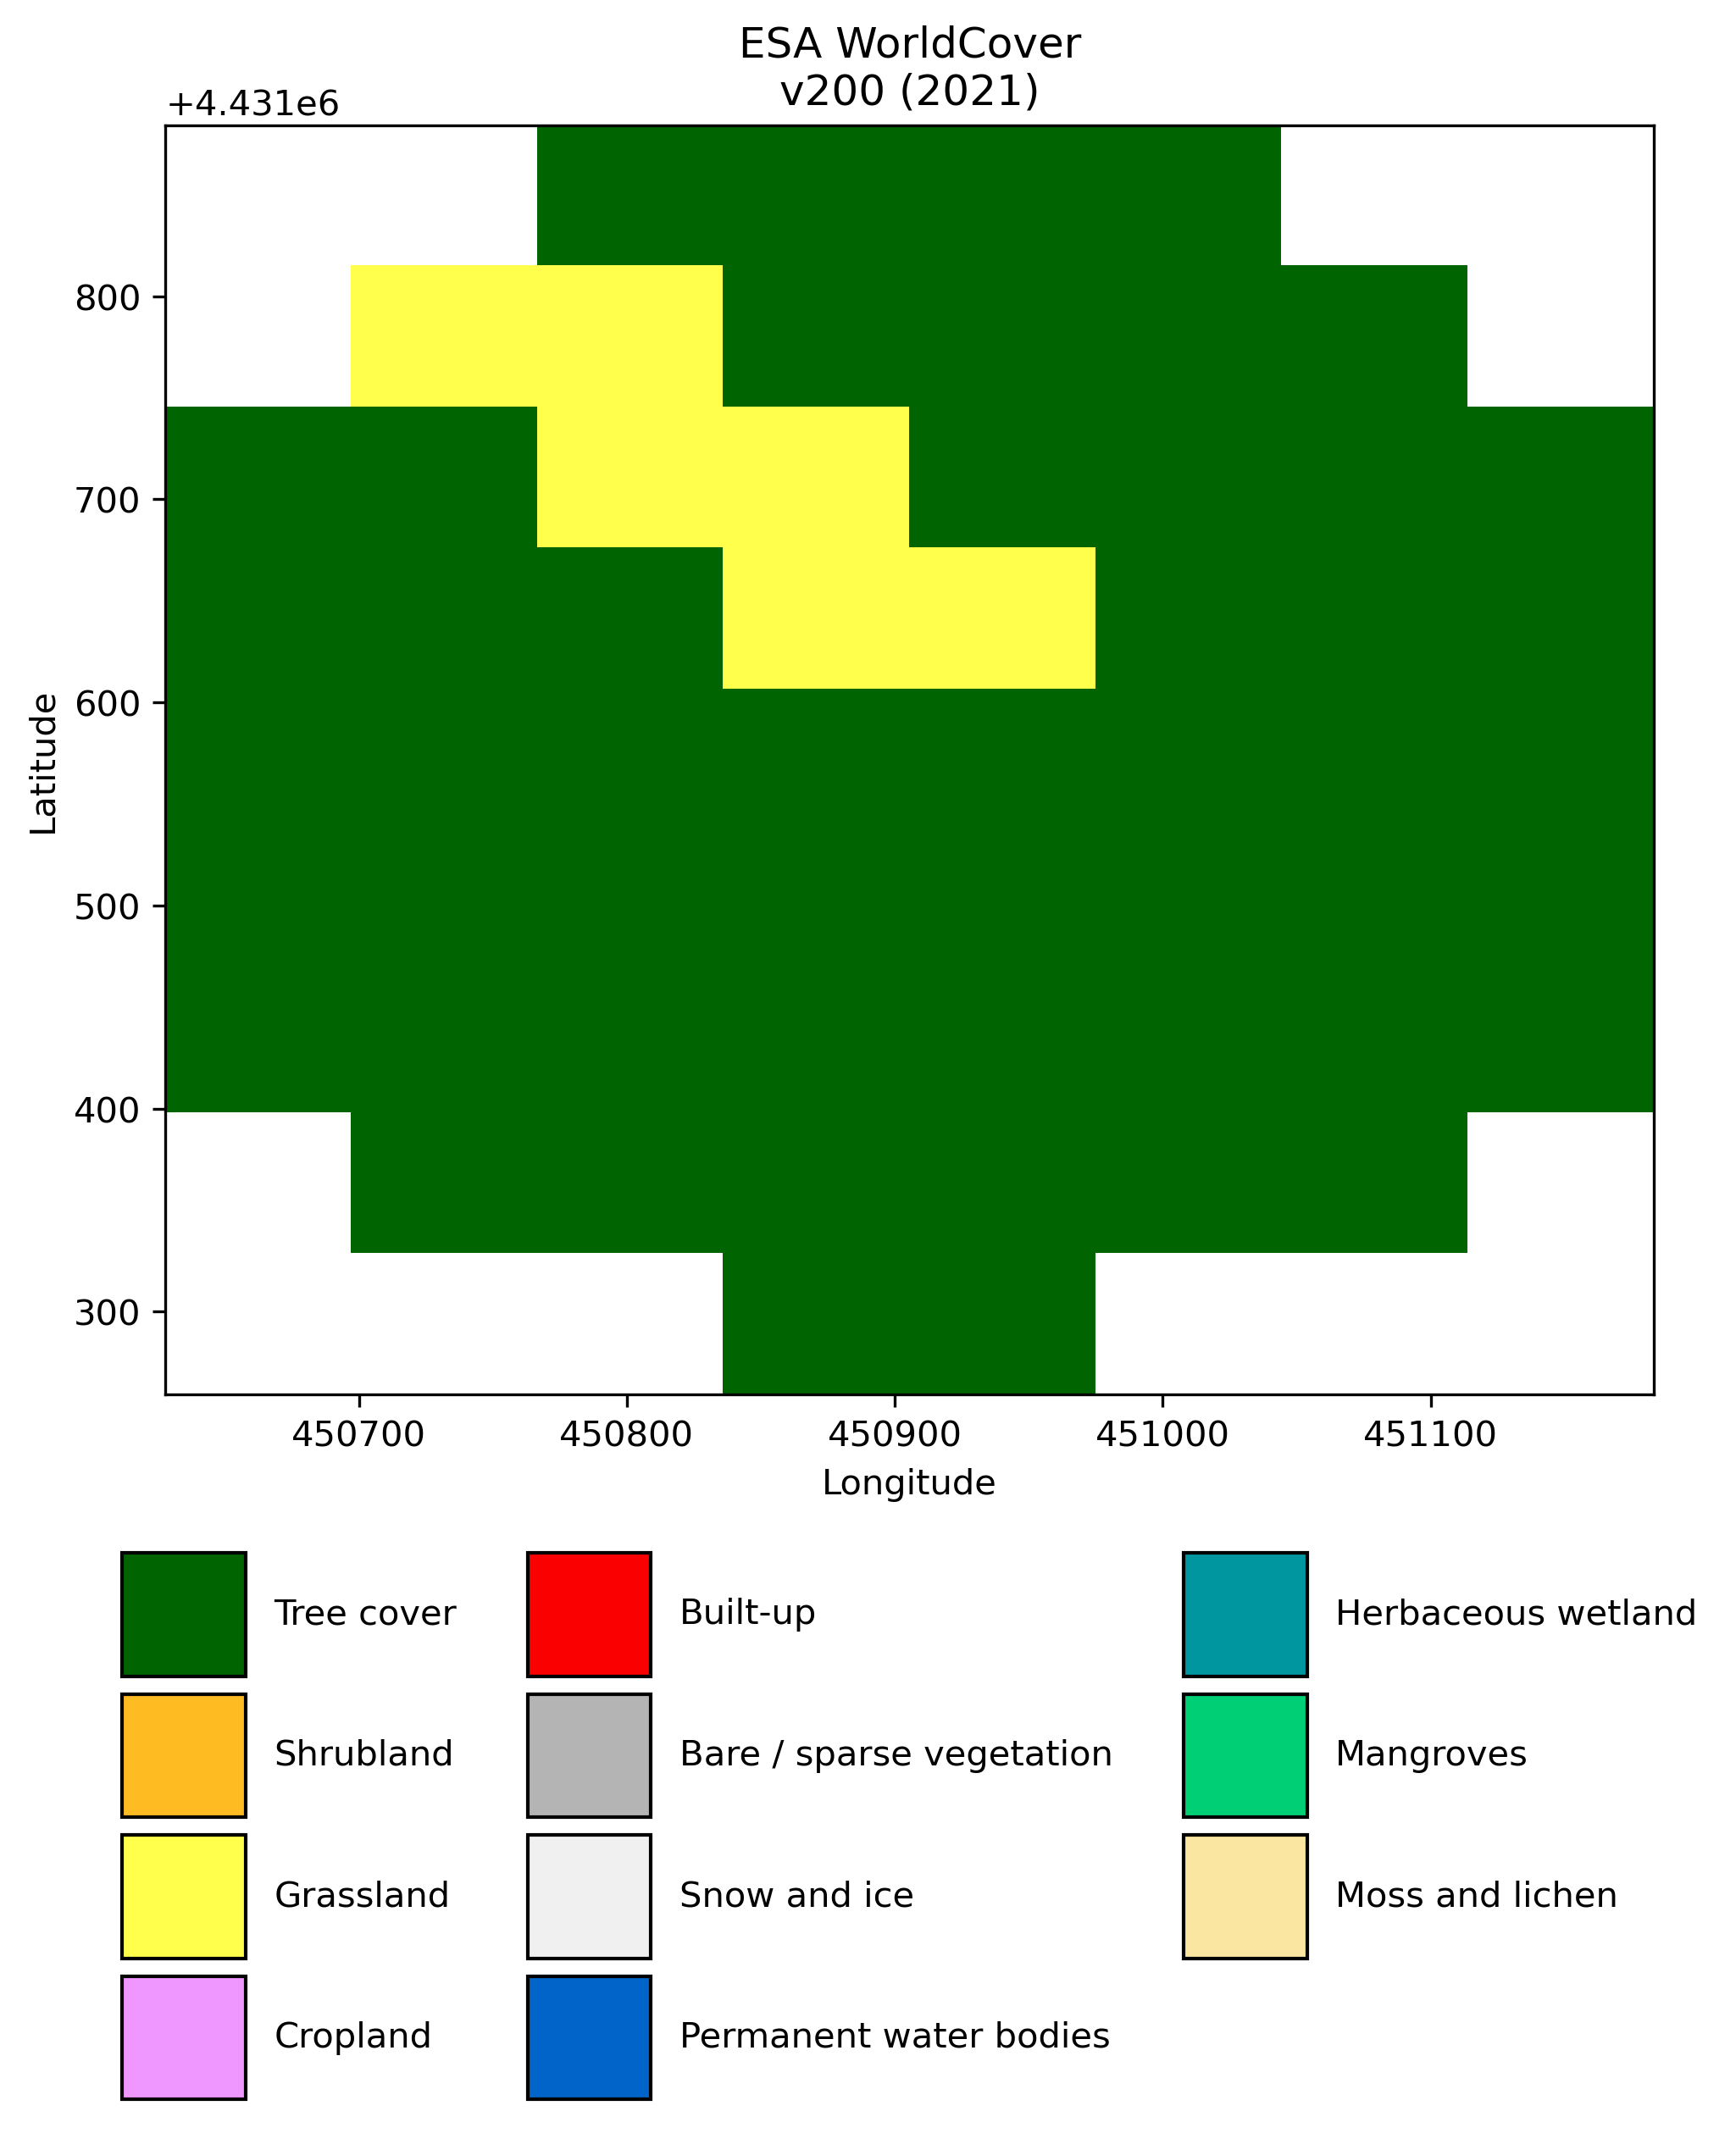

In [24]:
runoff_onset_station_ds['worldcover'].example_plot(runoff_onset_station_ds['worldcover'])

In [25]:
runoff_onset_station_ds=runoff_onset_station_ds.where((runoff_onset_station_ds['worldcover']!=80) & (runoff_onset_station_ds['worldcover']!=50))

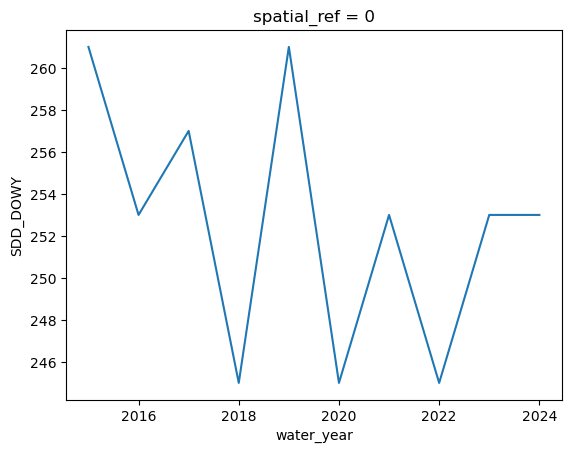

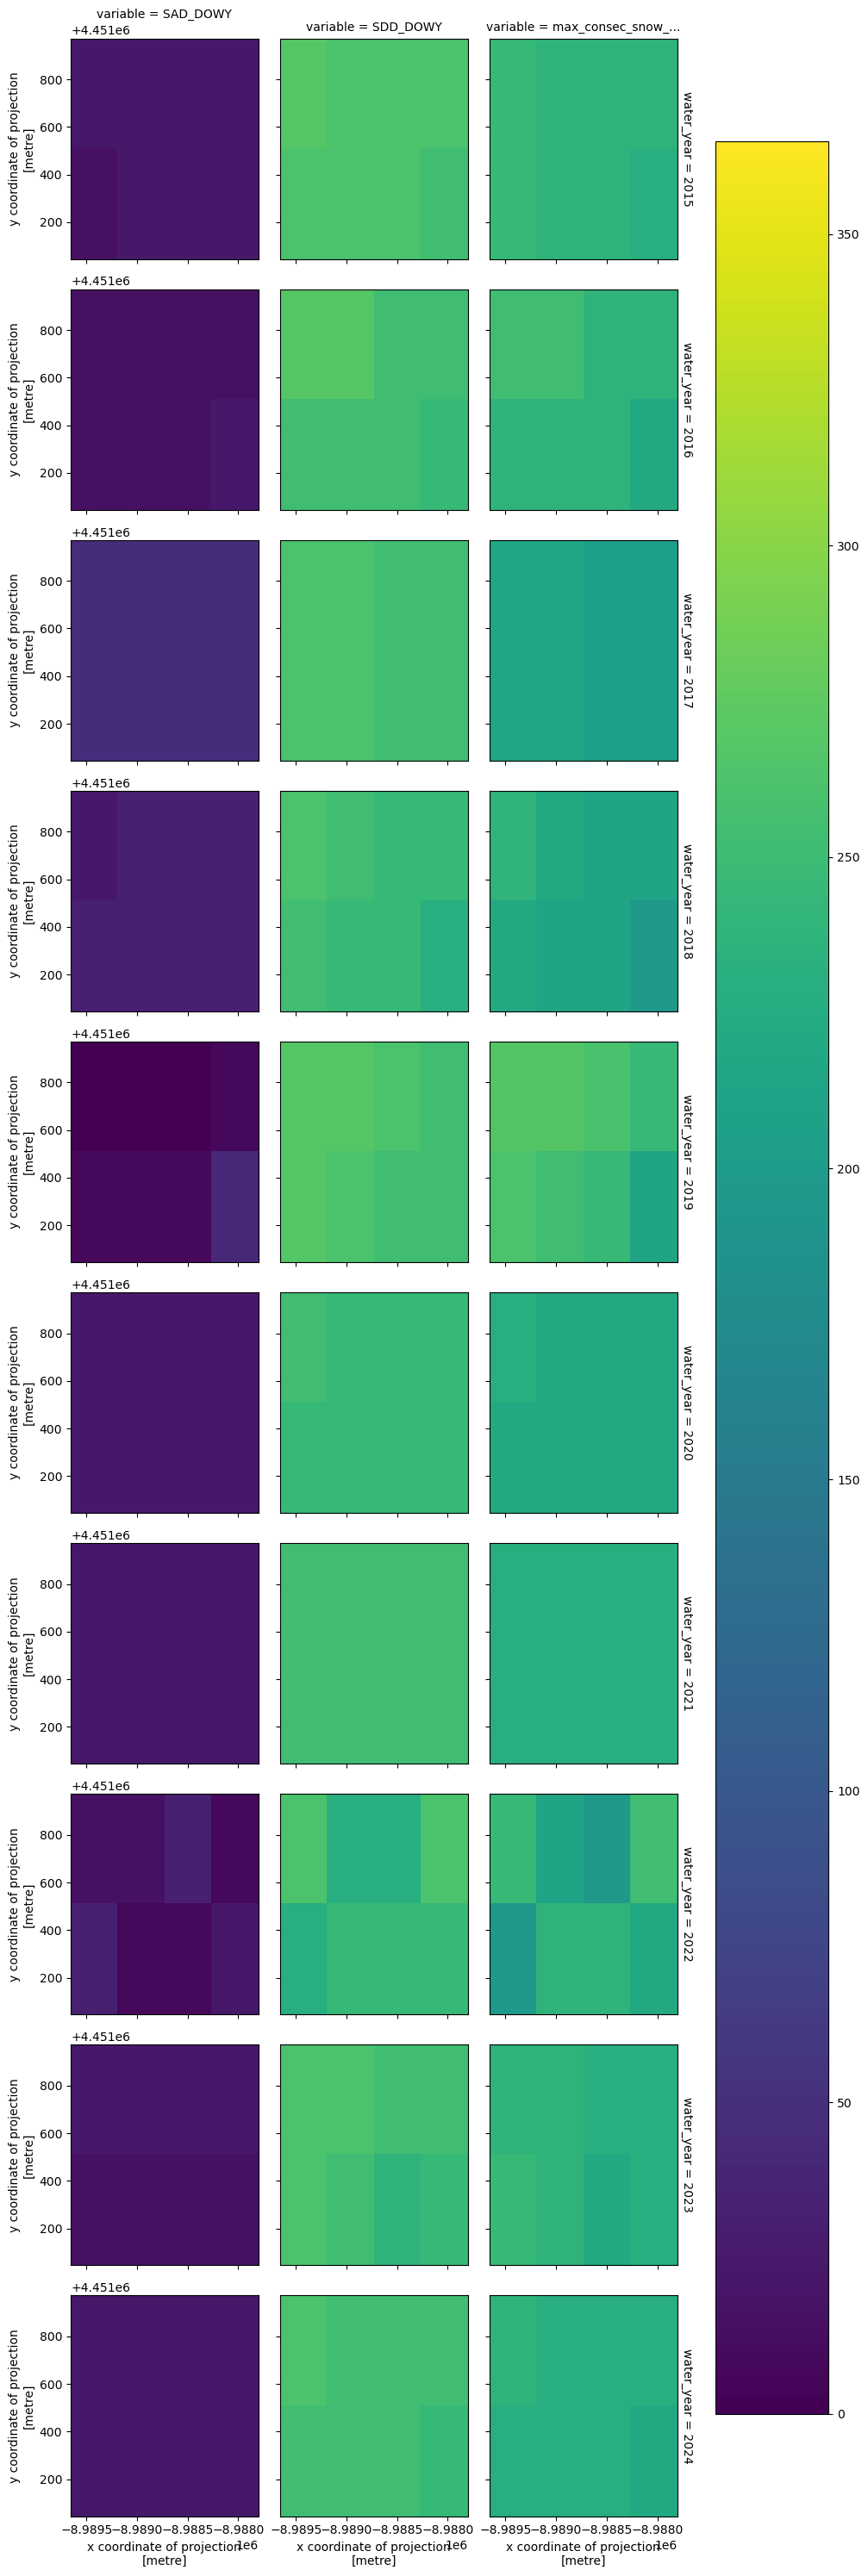

In [26]:
bbox_gdf = station_gdf
seasonal_snow_mask = xr.open_zarr(config.seasonal_snow_mask_store, consolidated=True, decode_coords='all') 
seasonal_snow_mask_clip_ds = seasonal_snow_mask.rio.clip_box(*bbox_gdf.total_bounds,crs=bbox_gdf.crs) # clip to correct box, maybe use total_bounds and then use crs 
seasonal_snow_mask_clip_ds

seasonal_snow_mask_clip_ds['SDD_DOWY'].median(dim=['x','y']).plot()

seasonal_snow_mask_clip_ds.to_dataarray().plot.imshow(row='water_year',col='variable',vmin=0,vmax=365)

/tmp/ipykernel_3910029/3390003565.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(fcf_thresh_values))


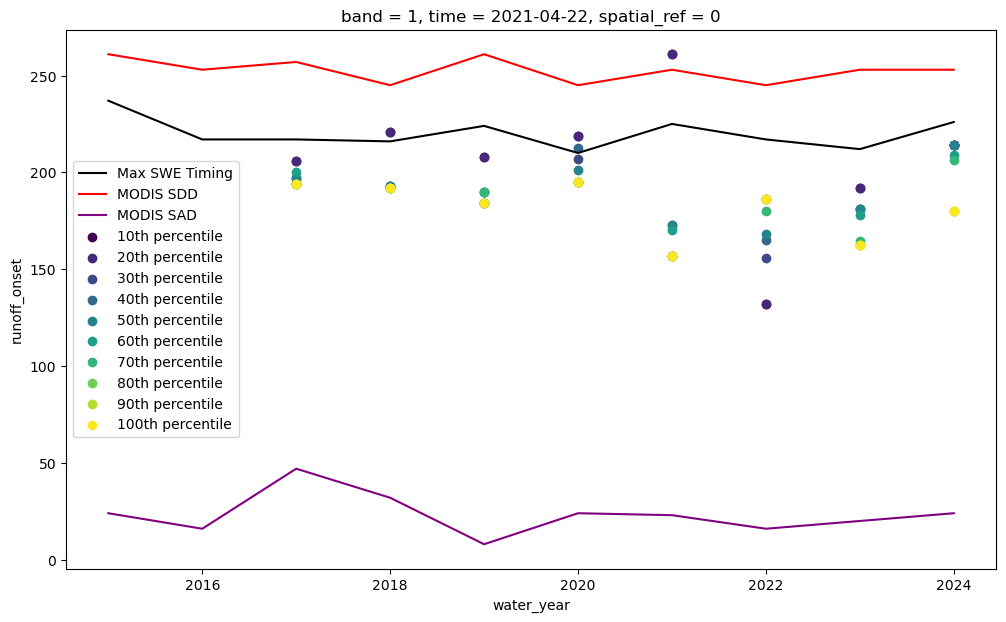

In [27]:
f,ax=plt.subplots(figsize=(12,7))
runoff_onset_max_swe_timing_WUS_ds['station_max_SWE_timing'].sel(station=station_code).plot(ax=ax, label='Max SWE Timing',color='black')
seasonal_snow_mask_clip_ds['SDD_DOWY'].median(dim=['x','y']).plot(label='MODIS SDD', color='red')
seasonal_snow_mask_clip_ds['SAD_DOWY'].median(dim=['x','y']).plot(label='MODIS SAD', color='purple')


fcf_thresh_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

cmap = cm.get_cmap('viridis', len(fcf_thresh_values))

for i, fcf_thresh in enumerate(fcf_thresh_values):
    color = cmap(i)
    runoff_onset_station_ds['runoff_onset'].where(runoff_onset_station_ds['fcf'] < fcf_thresh).median(dim=['x', 'y']).plot.scatter(ax=ax, label=f'{fcf_thresh}th percentile', color=color)
ax.legend()

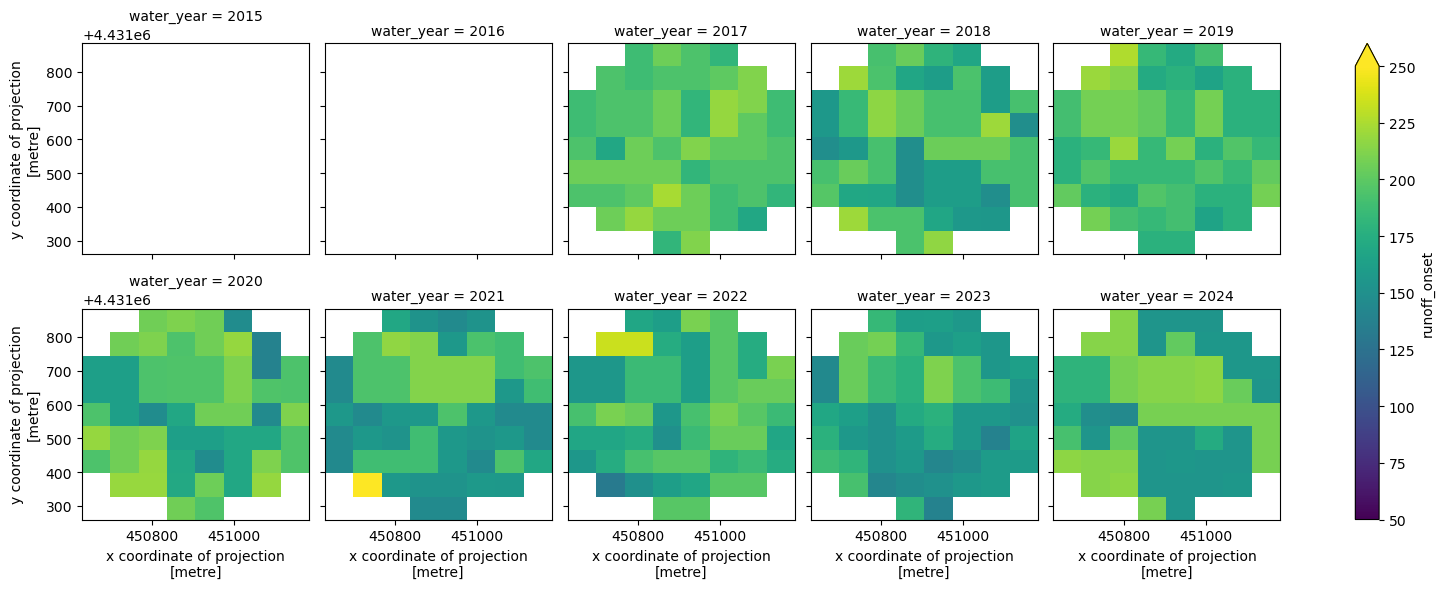

In [28]:
runoff_onset_station_ds['runoff_onset'].plot.imshow(col='water_year',col_wrap=5,robust=True,vmin=50,vmax=250)

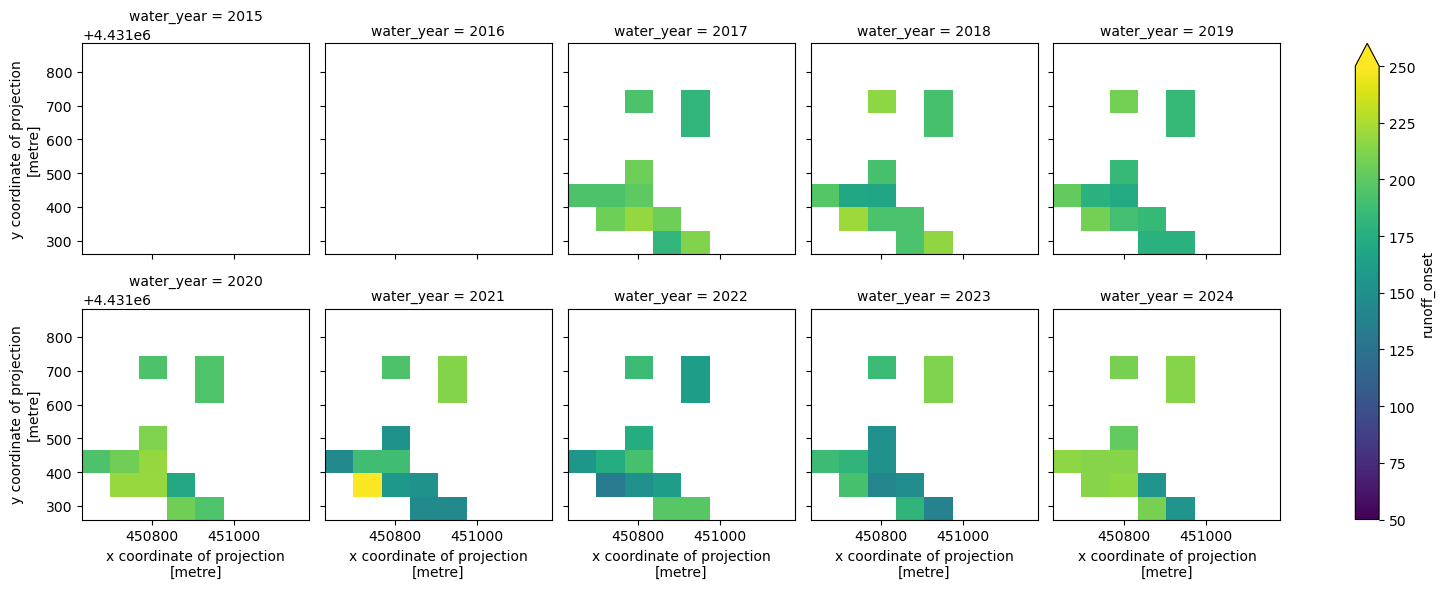

In [29]:
runoff_onset_station_ds['runoff_onset'].where(runoff_onset_station_ds['fcf']<50).plot.imshow(col='water_year',col_wrap=5,robust=True,vmin=50,vmax=250)

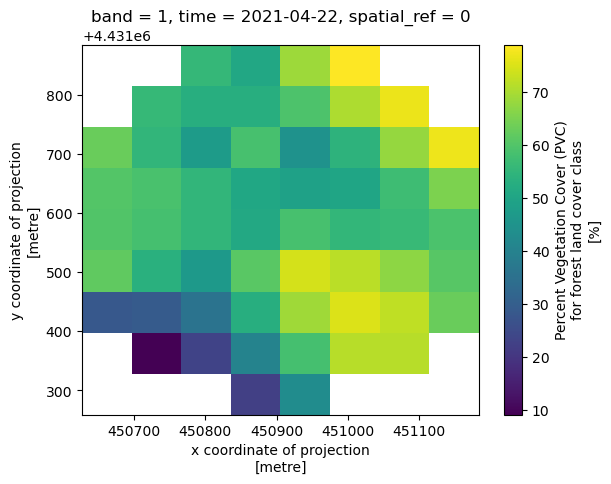

In [30]:
runoff_onset_station_ds['fcf'].where(runoff_onset_station_ds['runoff_onset_median']>0).plot.imshow()

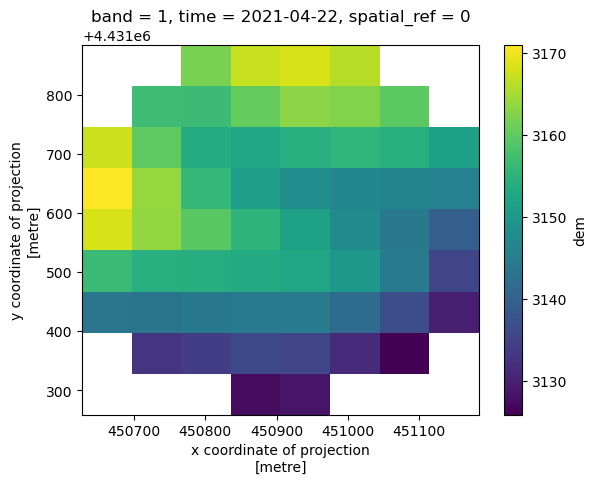

In [31]:
runoff_onset_station_ds['dem'].where(runoff_onset_station_ds['runoff_onset_median']>0).plot.imshow()

In [32]:
s1_rtc_ds = processing.get_sentinel1_rtc(runoff_onset_station_ds.odc.geobox)
s1_rtc_ds

backscatter_da = s1_rtc_ds.median(dim=['x','y']).compute()
backscatter_da

backscatter_dB_da = 10*np.log10(backscatter_da)
backscatter_dB_da

<xarray.Dataset> Size: 41kB
Dimensions:             (time: 982)
Coordinates:
    spatial_ref         int32 4B 32613
  * time                (time) datetime64[ns] 8kB 2014-10-04T01:02:21.111280 ...
    sat:orbit_state     (time) object 8kB 'ascending' ... 'descending'
    sat:relative_orbit  (time) int16 2kB 153 56 151 78 56 ... 78 56 78 158 158
    water_year          (time) int64 8kB 2015 2015 2015 2015 ... 2025 2025 2025
    DOWY                (time) int64 8kB 4 21 28 35 45 ... 210 220 222 239 263
Data variables:
    vv                  (time) float32 4kB -9.035 -9.494 ... -10.15 -9.718
    vh                  (time) float32 4kB nan nan nan ... -14.36 -15.09 -14.27
Attributes:
    hemisphere:  northern

In [33]:
MODIS_SDD_DOWY = seasonal_snow_mask_clip_ds['SDD_DOWY'].median(dim=['x','y']).values
MODIS_SAD_DOWY = seasonal_snow_mask_clip_ds['SAD_DOWY'].median(dim=['x','y']).values

WY_starts = [pd.Timestamp(year=year-1, month=10, day=1) for year in seasonal_snow_mask_clip_ds['SDD_DOWY'].water_year.values]
SAD_dates = [WY_starts[i]+pd.Timedelta(MODIS_SAD_DOWY[i]-1,'days') for i in range(len(WY_starts))]
SDD_dates = [WY_starts[i]+pd.Timedelta(MODIS_SDD_DOWY[i]-1,'days') for i in range(len(WY_starts))]

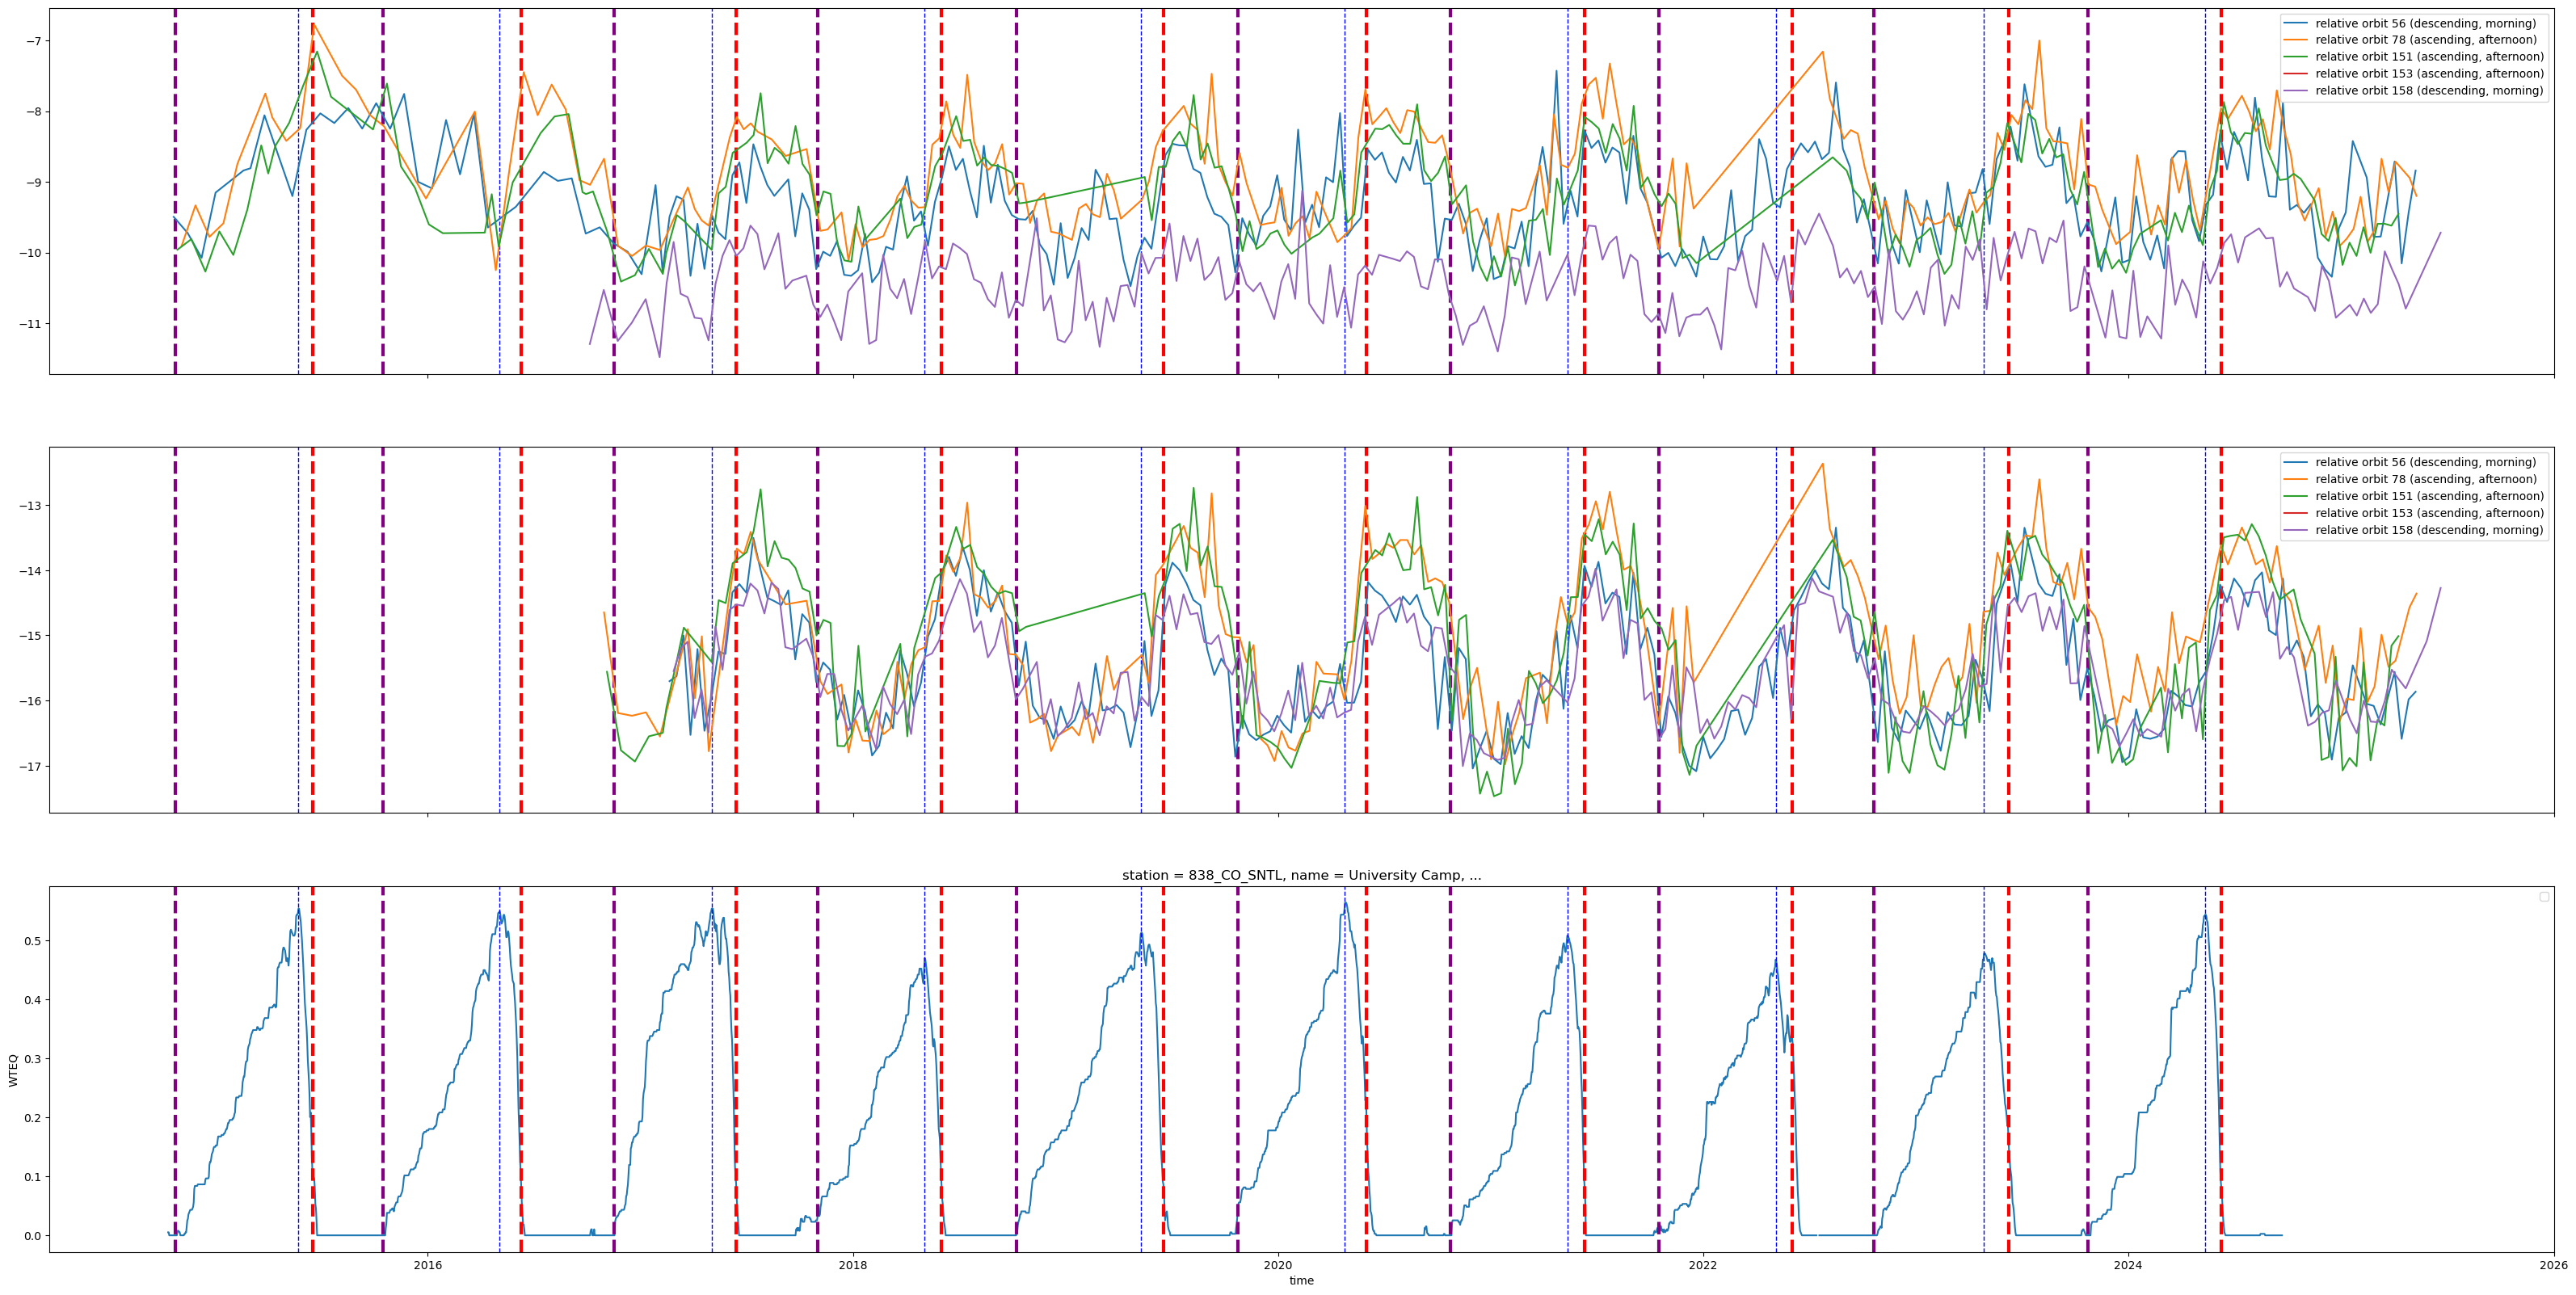

In [34]:
f,axs=plt.subplots(3,1,figsize=(40,20),sharex=True)

stations_WUS_da.sel(station=station_code).plot(ax=axs[2])
max_dates = stations_WUS_da.sel(station=station_code).groupby('WY').apply(lambda x: x.idxmax('time',skipna=True)).values

for ax in axs:
    for SAD_date in SAD_dates:
        ax.axvline(SAD_date,color='purple',linestyle='--',linewidth=3)
    for SDD_date in SDD_dates:
        ax.axvline(SDD_date,color='red',linestyle='--',linewidth=3)
    for max_date in max_dates:
        ax.axvline(max_date,color='blue',linestyle='--',linewidth=1)

#ax_db = ax.twinx()

for relative_orbit in np.unique(backscatter_dB_da['sat:relative_orbit'].values):
    backscatter_dB_relorbit_vv_da = backscatter_dB_da['vv'][backscatter_dB_da['sat:relative_orbit']==relative_orbit]
    backscatter_dB_relorbit_vh_da = backscatter_dB_da['vh'][backscatter_dB_da['sat:relative_orbit']==relative_orbit]
    orbit_state = backscatter_dB_relorbit_vv_da['sat:orbit_state'].values[0]
    time_of_day = 'afternoon' if orbit_state == 'ascending' else 'morning'
    axs[0].plot(pd.to_datetime(backscatter_dB_relorbit_vv_da.time),backscatter_dB_relorbit_vv_da.values, label=f'relative orbit {relative_orbit} ({orbit_state}, {time_of_day})')
    axs[1].plot(pd.to_datetime(backscatter_dB_relorbit_vh_da.time),backscatter_dB_relorbit_vh_da.values, label=f'relative orbit {relative_orbit} ({orbit_state}, {time_of_day})')

for ax in axs:
    ax.legend()
    #ax.set_xlim([pd.Timestamp('2023-10-01'),pd.Timestamp('2024-09-30')])
#axs[2].legend()
#axs[2].set_ylim([-30,-4])
#axs[2].set_ylim([0,1])




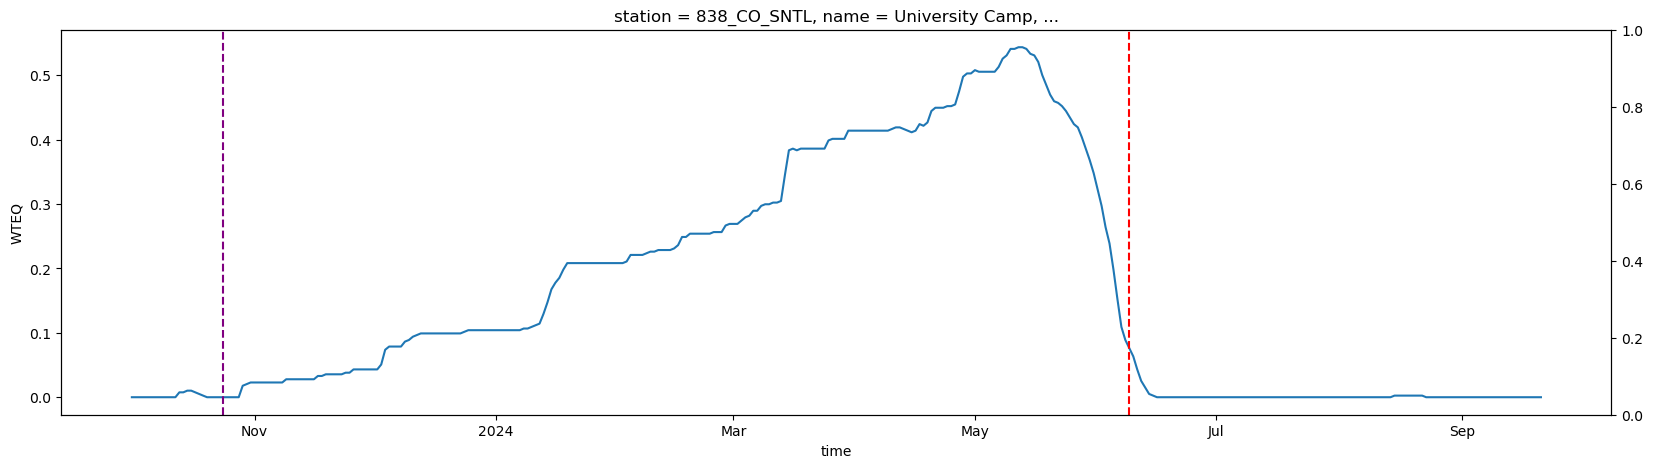

: 

In [ ]:
f,ax=plt.subplots(figsize=(20,5))
ax_db = ax.twinx()
water_year = 2024
stations_WUS_da.sel(station=station_code,time=slice(f'{water_year-1}-10-01',f'{water_year}-09-30')).plot(ax=ax)
ax.axvline(SAD_dates[9],color='purple',linestyle='--')
ax.axvline(SDD_dates[9],color='red',linestyle='--')

